In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


0. 데이터 전처리

In [3]:
train_data = pd.read_csv('/content/drive/MyDrive/data/최종_df_train.csv')
train_data.head(1)

,Unnamed: 0,id,lat,lng,gu,goodsType,payType,floor,floor_total,contractArea,realArea,direction,tag,tagList,deposit,monthlyPay
0,0,2233636969,37.677967,127.041725,dobong,아파트,매매,5,5,81,63,남향,ok. 일조량 및 관리 잘 된 복층,"['10년이내', '역세권', '복층', '탑층']",63000,0


In [4]:
train_data.shape

(93995, 16)

In [12]:
test_data = pd.read_csv('/content/drive/MyDrive/data/최종_df_test.csv')
test_data.head(1)

,Unnamed: 0,id,lat,lng,gu,goodsType,payType,floor,floor_total,contractArea,realArea,direction,tag,tagList,deposit,monthlyPay
0,0,2232528931,37.663404,127.038215,dobong,빌라,매매,2,3,95,64,남서향,방3화장실2 확장주방수리 일조및통풍좋은2층집.,"['25년이내', '주방교체', '방세개', '화장실두개']",32000,0


In [6]:
test_data.shape

(40290, 16)

In [13]:
total_data = pd.concat([train_data, test_data], axis = 0)
total_data.head(1)

,Unnamed: 0,id,lat,lng,gu,goodsType,payType,floor,floor_total,contractArea,realArea,direction,tag,tagList,deposit,monthlyPay
0,0,2233636969,37.677967,127.041725,dobong,아파트,매매,5,5,81,63,남향,ok. 일조량 및 관리 잘 된 복층,"['10년이내', '역세권', '복층', '탑층']",63000,0


In [14]:
total_data.shape

(134285, 16)

In [15]:
# Null값이 있는지 확인

total_data.isnull().values.sum()

11008

In [16]:
# Null값 제거

total_data = total_data.dropna(axis=0)
total_data.isnull().values.sum()

0

In [17]:
total_data.shape

(123685, 16)

In [18]:
# 'Unnamed: 0', 'id' 열 제거

drop_columns = ['Unnamed: 0', 'id', 'tag', 'tagList']
total_data.drop(drop_columns, axis=1, inplace=True)
total_data.head(1)

,lat,lng,gu,goodsType,payType,floor,floor_total,contractArea,realArea,direction,deposit,monthlyPay
0,37.677967,127.041725,dobong,아파트,매매,5,5,81,63,남향,63000,0


In [19]:
# 'payType' : 월세만

total_data.loc[:,'payType'].unique()

array(['매매', '전세', '월세', '단기임대'], dtype=object)

In [20]:
idx1 = np.where(total_data.loc[:,'payType']=='월세')[0]
total_data = total_data.iloc[idx1,:]
total_data.head(1)

,lat,lng,gu,goodsType,payType,floor,floor_total,contractArea,realArea,direction,deposit,monthlyPay
4,37.655622,127.041475,dobong,사무실,월세,2,8,30,22,북향,700,44


In [21]:
total_data.loc[:,'payType'].unique()

array(['월세'], dtype=object)

In [22]:
# 'goodsType' : 원룸만

total_data.loc[:,'goodsType'].unique()

array(['사무실', '상가', '아파트', '오피스텔', '빌라', '원룸', '상가주택', '단독/다가구', '재건축',
       '오피스텔분양권', '전원주택', '아파트분양권'], dtype=object)

In [23]:
idx2 = np.where(total_data.loc[:,'goodsType']=='원룸')[0]
total_data = total_data.iloc[idx2,:]
total_data.head(1)

,lat,lng,gu,goodsType,payType,floor,floor_total,contractArea,realArea,direction,deposit,monthlyPay
90,37.667483,127.043912,dobong,원룸,월세,8,13,17,13,동향,500,50


In [24]:
total_data.loc[:,'goodsType'].unique()

array(['원룸'], dtype=object)

In [25]:
# One-Hot Encoding

total_data.head(1)

,lat,lng,gu,goodsType,payType,floor,floor_total,contractArea,realArea,direction,deposit,monthlyPay
90,37.667483,127.043912,dobong,원룸,월세,8,13,17,13,동향,500,50


In [26]:
drop_columns = ['payType', 'goodsType']
total_data.drop(drop_columns, axis=1, inplace=True)
total_data.head(1)

,lat,lng,gu,floor,floor_total,contractArea,realArea,direction,deposit,monthlyPay
90,37.667483,127.043912,dobong,8,13,17,13,동향,500,50


In [27]:
total_data = pd.get_dummies(total_data)
total_data.iloc[:,33:].head(1)

,direction_남동향,direction_남서향,direction_남향,direction_동향,direction_북동향,direction_북서향,direction_북향,direction_서향
90,0,0,0,1,0,0,0,0


In [28]:
total_data.columns

Index(['lat', 'lng', 'floor', 'floor_total', 'contractArea', 'realArea',
       'deposit', 'monthlyPay', 'gu_dobong', 'gu_dongdaemun', 'gu_dongjak',
       'gu_eunpyeong', 'gu_gangbuk', 'gu_gangdong', 'gu_gangnam', 'gu_gangseo',
       'gu_guemcheon', 'gu_guro', 'gu_gwanak', 'gu_gwangjin', 'gu_jongno',
       'gu_jung', 'gu_jungnang', 'gu_mapo', 'gu_nowon', 'gu_seocho',
       'gu_seodaemun', 'gu_seongbuk', 'gu_seongdong', 'gu_songpa',
       'gu_yangcheon', 'gu_yeongdeungpo', 'gu_yongsan', 'direction_남동향',
       'direction_남서향', 'direction_남향', 'direction_동향', 'direction_북동향',
       'direction_북서향', 'direction_북향', 'direction_서향'],
      dtype='object')

In [29]:
# index 초기화

total_data = total_data.reset_index(drop=True)

total_data.head(2)

,lat,lng,floor,floor_total,contractArea,realArea,deposit,monthlyPay,gu_dobong,gu_dongdaemun,...,gu_yeongdeungpo,gu_yongsan,direction_남동향,direction_남서향,direction_남향,direction_동향,direction_북동향,direction_북서향,direction_북향,direction_서향
0,37.667483,127.043912,8,13,17,13,500,50,1,0,...,0,0,0,0,0,1,0,0,0,0
1,37.650608,127.036669,9,9,19,12,3000,20,1,0,...,0,0,0,0,0,0,0,0,1,0


In [30]:
# lat, lng -> distance 열 추가

distance = (total_data.loc[:,'lat']**2 + total_data.loc[:,'lng']**2).values
distance

array([17558.99485182, 17555.88355339, 17555.98575248, ...,
       17548.60851916, 17556.4424272 , 17549.47146599])

In [31]:
total_data['distance'] = distance
total_data.head(1)

,lat,lng,floor,floor_total,contractArea,realArea,deposit,monthlyPay,gu_dobong,gu_dongdaemun,...,gu_yongsan,direction_남동향,direction_남서향,direction_남향,direction_동향,direction_북동향,direction_북서향,direction_북향,direction_서향,distance
0,37.667483,127.043912,8,13,17,13,500,50,1,0,...,0,0,0,0,1,0,0,0,0,17558.994852


In [32]:
# floor, floor_total -> floor_rate 열 추가

floor_rate = (total_data.loc[:,'floor'] / total_data.loc[:,'floor_total']).values
floor_rate

array([0.61538462, 1.        , 0.5       , ..., 0.25      , 0.6       ,
       0.4       ])

In [33]:
total_data['floor_rate'] = floor_rate
total_data.head(1)

,lat,lng,floor,floor_total,contractArea,realArea,deposit,monthlyPay,gu_dobong,gu_dongdaemun,...,direction_남동향,direction_남서향,direction_남향,direction_동향,direction_북동향,direction_북서향,direction_북향,direction_서향,distance,floor_rate
0,37.667483,127.043912,8,13,17,13,500,50,1,0,...,0,0,0,1,0,0,0,0,17558.994852,0.615385


In [34]:
# contractArea, realArea -> area_rate 열 추가

area_rate = (total_data.loc[:,'realArea'] / total_data.loc[:,'contractArea']).values
area_rate

array([0.76470588, 0.63157895, 0.84210526, ..., 0.7       , 0.81818182,
       0.7       ])

In [35]:
total_data['area_rate'] = area_rate
total_data.head(1)

,lat,lng,floor,floor_total,contractArea,realArea,deposit,monthlyPay,gu_dobong,gu_dongdaemun,...,direction_남서향,direction_남향,direction_동향,direction_북동향,direction_북서향,direction_북향,direction_서향,distance,floor_rate,area_rate
0,37.667483,127.043912,8,13,17,13,500,50,1,0,...,0,0,1,0,0,0,0,17558.994852,0.615385,0.764706


In [36]:
# 새로 추가된 열들

total_data.iloc[:,41:].head(1)

,distance,floor_rate,area_rate
0,17558.994852,0.615385,0.764706


In [37]:
# y_target = 'monthlyPay'으로 두고 확인

y_target = total_data.loc[:,'monthlyPay']
y_target = y_target.reset_index(drop=True)
y_target

0       50
1       20
2       33
3       40
4       33
        ..
4098    75
4099    84
4100    80
4101    45
4102    95
Name: monthlyPay, Length: 4103, dtype: int64

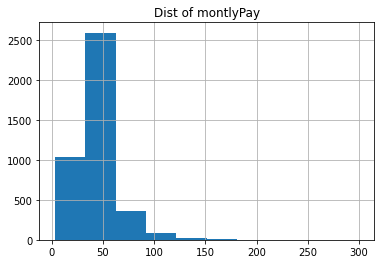

In [38]:
y_target.hist()
plt.title('Dist of montlyPay')
plt.show()

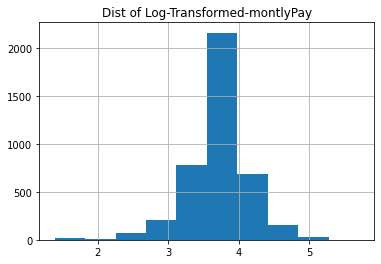

In [39]:
# label값을 정규분포로 바꿔준다.

y_target_log = np.log1p(y_target)
y_target_log.hist()
plt.title('Dist of Log-Transformed-montlyPay')
plt.show()

In [40]:
# X_features : 'monthlyPay'을 제외한 모든 열

X_features = total_data.drop(['monthlyPay'], axis=1, inplace=False)
X_features.head(1)

,lat,lng,floor,floor_total,contractArea,realArea,deposit,gu_dobong,gu_dongdaemun,gu_dongjak,...,direction_남서향,direction_남향,direction_동향,direction_북동향,direction_북서향,direction_북향,direction_서향,distance,floor_rate,area_rate
0,37.667483,127.043912,8,13,17,13,500,1,0,0,...,0,0,1,0,0,0,0,17558.994852,0.615385,0.764706


In [41]:
# 저장

X_features.to_csv('/content/drive/MyDrive/X_features.csv')
y_target.to_csv('/content/drive/MyDrive/y_target.csv')
y_tary_target_logget.to_csv('/content/drive/MyDrive/y_target_log.csv')

1. LinearRegression

In [42]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# log 값 변환 시 NaN등의 이슈로 log() 가 아닌 log1p() 를 이용하여 RMSLE 계산
def rmsle(y, pred):
    log_y = np.log1p(y)
    log_pred = np.log1p(pred)
    squared_error = (log_y - log_pred) ** 2
    rmsle = np.sqrt(np.mean(squared_error))
    return rmsle

# 사이킷런의 mean_square_error() 를 이용하여 RMSE 계산
def rmse(y,pred):
    return np.sqrt(mean_squared_error(y,pred))

# MSE, RMSE, RMSLE 를 모두 계산 
def evaluate_regr(y,pred):
    rmsle_val = rmsle(y,pred)
    rmse_val = rmse(y,pred)
    # MAE 는 scikit learn의 mean_absolute_error() 로 계산
    mae_val = mean_absolute_error(y,pred)
    print('RMSLE: {0:.3f}, RMSE: {1:.3F}, MAE: {2:.3F}'.format(rmsle_val, rmse_val, mae_val))
    return (rmsle_val, rmse_val, mae_val)

RMSLE: 0.349, RMSE: 16.828, MAE: 10.957


<BarContainer object of 3 artists>

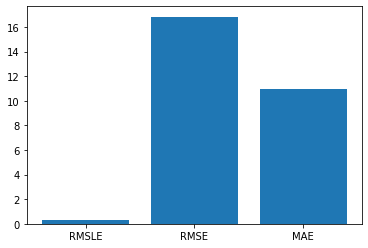

In [43]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# test/train 분할
X_train, X_test, y_train, y_test = train_test_split(X_features, y_target_log, test_size=0.3, random_state=0)

# Model
lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)
pred = lr_reg.predict(X_test)

# y_target값 다시 로그 변환 해제
y_test_exp = np.expm1(y_test).values

# 예측값 역시, 변환된 타깃 기반으로 학습되었음으로 expm1으로 스케일 변환
pred_exp = np.expm1(pred)

result = evaluate_regr(y_test_exp, pred_exp)
plt.bar(['RMSLE','RMSE','MAE'], result)

In [44]:
total_data.head(2)

,lat,lng,floor,floor_total,contractArea,realArea,deposit,monthlyPay,gu_dobong,gu_dongdaemun,...,direction_남서향,direction_남향,direction_동향,direction_북동향,direction_북서향,direction_북향,direction_서향,distance,floor_rate,area_rate
0,37.667483,127.043912,8,13,17,13,500,50,1,0,...,0,0,1,0,0,0,0,17558.994852,0.615385,0.764706
1,37.650608,127.036669,9,9,19,12,3000,20,1,0,...,0,0,0,0,0,1,0,17555.883553,1.000000,0.631579


In [46]:
# 중요피쳐를 찾아내기 위해, 각 피쳐들을 스케일링해준다.
# 이후에 회귀계수의 절댓값이 클수록 중요피쳐로 생각해준다.

from sklearn.preprocessing import MinMaxScaler

total_data = pd.concat([X_features, y_target], axis=1)

scaler = MinMaxScaler()
scaler.fit(total_data)
trans_data = scaler.transform(total_data)

# numpy -> df
trans_data_df = pd.DataFrame(data=trans_data, columns=total_data.columns)
trans_data_df.head(1) # 0~1 사이의 값들을 가짐을 확인할 수 있다.

,lat,lng,floor,floor_total,contractArea,realArea,deposit,gu_dobong,gu_dongdaemun,gu_dongjak,...,direction_남향,direction_동향,direction_북동향,direction_북서향,direction_북향,direction_서향,distance,floor_rate,area_rate,monthlyPay
0,0.911947,0.648178,0.4,0.521739,0.044068,0.212766,0.01,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.743858,0.615385,0.751337,0.158249


RMSLE: inf, RMSE: 1.140, MAE: 1.138


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log1p
  


<BarContainer object of 3 artists>

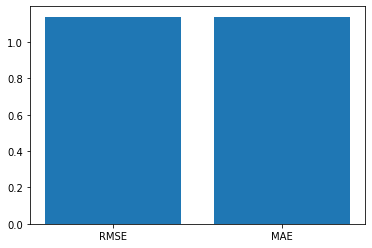

In [49]:
# 스케일링 이후, 재학습을 시도

# X_features : 'monthlyPay'을 제외한 모든 열
X_features_df = trans_data_df.drop(['monthlyPay'], axis=1, inplace=False)

# y_target = 'monthlyPay'으로 두고 확인
y_target_df = trans_data_df.loc[:,'monthlyPay']
y_target_df = y_target_df.reset_index(drop=True)
y_target_log_df = np.log1p(y_target_df) 

# test/train 분할
X_train_trans, X_test, y_train, y_test = train_test_split(X_features_df, y_target_log_df, test_size=0.3, random_state=0)

# Model
lr_reg1 = LinearRegression()
lr_reg1.fit(X_train, y_train)
pred = lr_reg1.predict(X_test)

# y_target값 다시 로그 변환 해제
y_test_exp = np.expm1(y_test).values

# 예측값 역시, 변환된 타깃 기반으로 학습되었음으로 expm1으로 스케일 변환
pred_exp = np.expm1(pred)

result = evaluate_regr(y_test_exp, pred_exp)
plt.bar(['RMSLE','RMSE','MAE'], result) # 0~1로 숫자가 매우 작아, inf값이 나오기도 한다. 하지만 중요한 건 회귀계수의 크기이다.

In [51]:
# 표준화한 회귀계수의 절댓값

coef = lr_reg1.coef_
coef_abs = np.abs(coef)
coef_abs

array([9.33129767e+01, 3.16263882e+02, 9.63947395e-04, 5.88542621e-03,
       3.41213746e-04, 3.93923260e-03, 5.46310831e-06, 8.91648614e-03,
       6.89801374e-03, 1.79971667e-02, 1.07993607e-02, 7.18766034e-03,
       7.12541524e-04, 6.41497678e-02, 4.71942093e-03, 3.15794334e-02,
       2.80714634e-02, 3.17078979e-02, 1.47306504e-02, 5.28105568e-04,
       2.15993597e-02, 1.83849543e-03, 3.28408130e-02, 2.94295489e-03,
       1.64407968e-02, 4.53508854e-02, 1.87140270e-02, 5.21666908e-03,
       5.92157810e-03, 7.30142784e-04, 1.07484445e-02, 5.09479815e-03,
       5.12117565e-03, 1.56140865e-03, 4.67351706e-03, 2.61546937e-03,
       3.88655086e-03, 2.18134964e-03, 3.60719099e-03, 1.29558709e-03,
       1.24490206e+00, 8.39104144e-03, 4.26523107e-02])

In [53]:
# 회귀계수의 절댓값 크기 index

idx = coef_abs.argsort()[::-1]
idx

array([ 1,  0, 40, 13, 25, 42, 22, 17, 15, 16, 20, 26,  9, 24, 18, 10, 30,
        7, 41, 11,  8, 28,  3, 27, 32, 31, 14, 34,  5, 36, 38, 23, 35, 37,
       21, 33, 39,  2, 29, 12, 19,  4,  6])

In [54]:
# 회귀계수의 절댓값을 큰 순서대로 정렬

coef = coef[idx]
coef_abs = coef_abs[idx]

In [55]:
# 회귀계수의 독립변수이름을 큰 순서대로 정렬

name = X_features_df.head(1).columns[idx].values
name

array(['lng', 'lat', 'distance', 'gu_gangnam', 'gu_seodaemun',
       'area_rate', 'gu_mapo', 'gu_gwanak', 'gu_guemcheon', 'gu_guro',
       'gu_jung', 'gu_seongbuk', 'gu_dongjak', 'gu_seocho', 'gu_gwangjin',
       'gu_eunpyeong', 'gu_yeongdeungpo', 'gu_dobong', 'floor_rate',
       'gu_gangbuk', 'gu_dongdaemun', 'gu_songpa', 'floor_total',
       'gu_seongdong', 'direction_남동향', 'gu_yongsan', 'gu_gangseo',
       'direction_남향', 'realArea', 'direction_북동향', 'direction_북향',
       'gu_nowon', 'direction_동향', 'direction_북서향', 'gu_jungnang',
       'direction_남서향', 'direction_서향', 'floor', 'gu_yangcheon',
       'gu_gangdong', 'gu_jongno', 'contractArea', 'deposit'],
      dtype=object)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


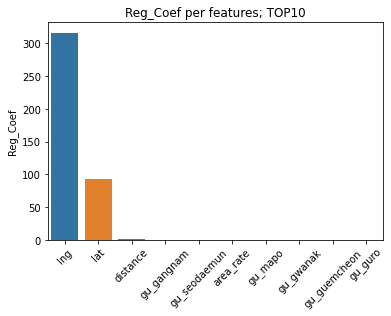

In [56]:
# top10

sns.barplot(name[0:10], coef_abs[0:10])
plt.xticks(rotation=45)
plt.ylabel('Reg_Coef')
plt.title('Reg_Coef per features; TOP10')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


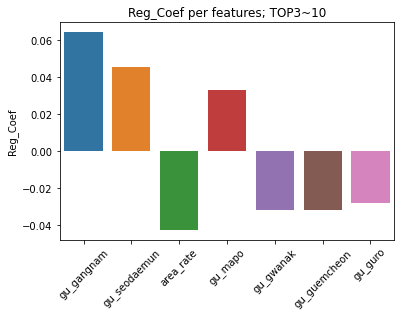

In [58]:
# top3~10

sns.barplot(name[3:10], coef[3:10])
plt.xticks(rotation=45)
plt.ylabel('Reg_Coef')
plt.title('Reg_Coef per features; TOP3~10')
plt.show()

2. Ensemble

In [65]:
# 데이터 분할

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# test/train 분할
X_train, X_test, y_train, y_test = train_test_split(X_features, y_target_log, test_size=0.3, random_state=0)

# y_target값 다시 로그 변환 해제
y_test_exp = np.expm1(y_test).values

In [66]:
def get_model_predict(model, X_train, X_test, y_train, y_test, is_expm1=False):
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    if is_expm1 :
        y_test = np.expm1(y_test)
        pred = np.expm1(pred)
        print(pred)
    print('###',model.__class__.__name__,'###')
    (rmsle_val, rmse_val, mae_val) = evaluate_regr(y_test, pred)
    return (rmsle_val, rmse_val, mae_val)

# end of function get_model_predict 

In [64]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

result = []
# 랜덤 포레스트, GBM, XGBoost, LightGBM model 별로 평가 수행
rf_reg = RandomForestRegressor(n_estimators=500)
gbm_reg = GradientBoostingRegressor(n_estimators=500)
xgb_reg = XGBRegressor(n_estimators=500)
lgbm_reg = LGBMRegressor(n_estimators=500)

for model in [rf_reg, gbm_reg, xgb_reg, lgbm_reg]:
    # XGBoost의 경우 DataFrame이 입력 될 경우 버전에 따라 오류 발생 가능. ndarray로 변환.
    result.append(get_model_predict(model,X_train.values, X_test.values, y_train.values, y_test.values,is_expm1=True))

[32.98867657 44.63854395 43.38669023 ... 38.50330351 15.65541077
 50.91726753]
### RandomForestRegressor ###
RMSLE: 0.281, RMSE: 13.878, MAE: 8.123
[30.90563178 42.21741727 42.49689777 ... 39.26741734 16.59563065
 56.80016886]
### GradientBoostingRegressor ###
RMSLE: 0.276, RMSE: 13.384, MAE: 8.305
[05:18:15] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[30.253765 44.288933 42.815475 ... 38.72387  16.19361  55.80613 ]
### XGBRegressor ###
RMSLE: 0.277, RMSE: 13.399, MAE: 8.349
[34.92942455 47.1492662  42.79072028 ... 37.20754059 15.70763694
 49.43193649]
### LGBMRegressor ###
RMSLE: 0.283, RMSE: 13.691, MAE: 8.103


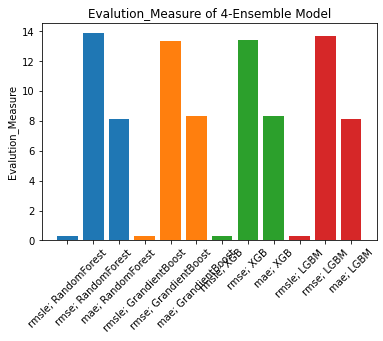

In [67]:
modelname = ['RandomForest','GrandientBoost','XGB','LGBM']

for i in range(len(result)):
  plt.bar(['rmsle; {}'.format(modelname[i]),'rmse; {}'.format(modelname[i]),'mae; {}'.format(modelname[i])], result[i])
  plt.xticks(rotation=45)
plt.ylabel('Evalution_Measure')
plt.title('Evalution_Measure of 4-Ensemble Model')
plt.show()

중요피쳐 확인

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 45224 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54693 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 46041 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49436 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48513 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 45224 missing from current font.
  font.set_

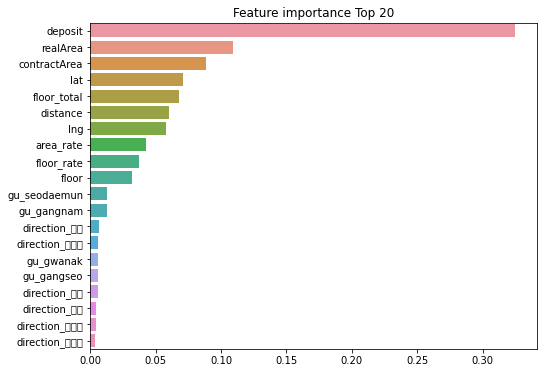

In [68]:
# 랜덤포레스트 
# deposit > realArea > Ing
# lng(경도) > lat(위도)

ftr_importances_values = rf_reg.feature_importances_
ftr_importances = pd.Series(ftr_importances_values, index=X_features.columns)
ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]

plt.figure(figsize=(8,6))
plt.title('Feature importance Top 20')
sns.barplot(x=ftr_top20, y=ftr_top20.index)
plt.show()

In [69]:
X_features.head(1)

,lat,lng,floor,floor_total,contractArea,realArea,deposit,gu_dobong,gu_dongdaemun,gu_dongjak,...,direction_남서향,direction_남향,direction_동향,direction_북동향,direction_북서향,direction_북향,direction_서향,distance,floor_rate,area_rate
0,37.667483,127.043912,8,13,17,13,500,1,0,0,...,0,0,1,0,0,0,0,17558.994852,0.615385,0.764706


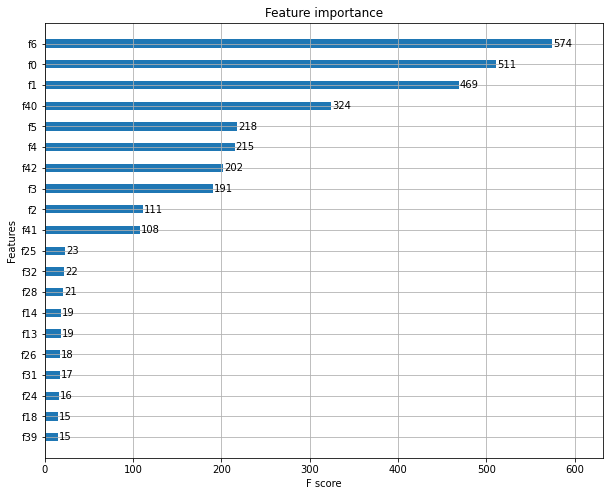

In [70]:
# XGB 
# f1;lng(경도) > f6;deposit(보증금) > f0;lat(위도)

from xgboost import plot_importance

fig, ax = plt.subplots(1,1, figsize=(10,8))
plot_importance(xgb_reg, ax=ax, max_num_features=20, height=0.4)

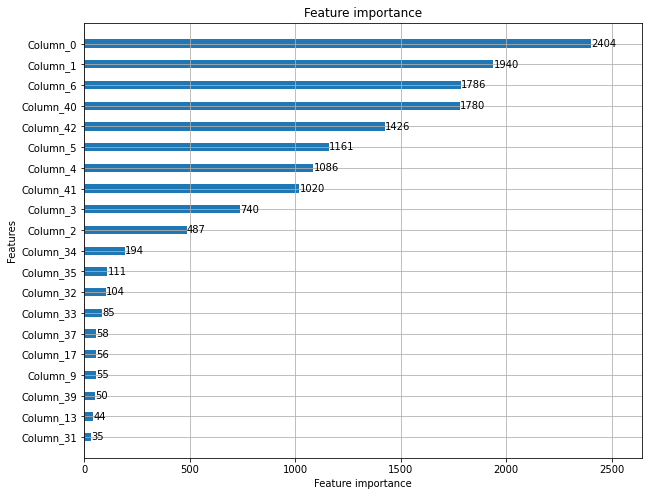

In [71]:
# LGBM 
# Column_1;lng(경도) > Column_0;lat(위도) > Column_6;deposit(보증금) 

from lightgbm import plot_importance

fig, ax = plt.subplots(1,1, figsize=(10,8))
plot_importance(lgbm_reg, ax=ax, max_num_features=20, height=0.4)

In [72]:
# 하이퍼파라미터 튜닝

import random

n_estimators = []
learning_rate = []
for i in range(10):
  n_estimators.append(random.randrange(1,10)*100)
  learning_rate.append(np.round(random.random(),1)/10)

# xgb
max_depth = [1,3,5,7]
eta = [0.1,0.3,0.5,0.7,0.9]
min_child_weight = [1,3,5,7]
colsample_bytree = [0.1,0.3,0.5,0.7,0.9]
reg_alpha = [0.01,0.03,0.05]

# lgbm
num_leaves = [32,64]
max_depth = [128,160]
min_child_samples = [60,100]
subsample = [0.8,1]

여기서부터는 시간이 조금 걸린다.

In [ ]:
# xgb-tunning

best_parm1 = {'max_depth':0, 'eta':0, 'min_child_weight':0, 'colsample_bytree':0, 'reg_alpha':0}
RMSE = 100

for a1 in max_depth:
  for a2 in eta:
    for a3 in min_child_weight:
      for a4 in colsample_bytree:
        for a5 in reg_alpha:
          xgb_reg = XGBRegressor(n_estimators=500, max_depth=a1, eta=a2, min_child_weight=a3, colsample_bytree=a4, reg_alpha=a5)
          temp = get_model_predict(xgb_reg, X_train.values, X_test.values, y_train.values, y_test.values, is_expm1=True)
          temp = temp[1]
          if temp < RMSE:
            RMSE = temp
            best_parm1['max_depth'] = a1
            best_parm1['eta'] = a2
            best_parm1['min_child_weight'] = a3
            best_parm1['colsample_bytree'] = a4
            best_parm1['reg_alpha'] = a5

xgb_reg = XGBRegressor(n_estimators=500, max_depth=best_parm1['max_depth'], eta=best_parm1['eta'], min_child_weight=best_parm1['min_child_weight'],
                       colsample_bytree=best_parm1['colsample_bytree'], reg_alpha=best_parm1['reg_alpha'])


print('-'*30)
print("best-parameter :", best_parm1)
print("RMSE value about best-parameter :", get_model_predict(xgb_reg,X_train.values, X_test.values, y_train.values, y_test.values,is_expm1=True))

# pickle로 저장
import pickle
with open('/content/drive/MyDrive/xgbPt.pkl','wb') as f:
  pickle.dump(best_parm1,f)

[08:27:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
### XGBRegressor ###
RMSLE: 0.056, RMSE: 0.069, MAE: 0.044
[08:27:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
### XGBRegressor ###
RMSLE: 0.056, RMSE: 0.068, MAE: 0.044
[08:27:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
### XGBRegressor ###
RMSLE: 0.056, RMSE: 0.069, MAE: 0.043
[08:27:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
### XGBRegressor ###
RMSLE: 0.056, RMSE: 0.068, MAE: 0.046
[08:27:59] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
### XGBRegressor ###
RMSLE: 0.057, RMSE: 0.069, MAE: 0.047
[08:28:02] WARNING: /workspace/src/objective/regression_obj.cu:152: re

KeyboardInterrupt: ignored

In [ ]:
# xgb-tunning

best_parm2 = {'num_leaves':0, 'max_depth':0, 'min_child_samples':0, 'subsample':0}
RMSE = 100

for a1 in num_leaves:
  for a2 in max_depth:
    for a3 in min_child_samples:
      for a4 in subsample:
        lgbm_reg = LGBMRegressor(n_estimators=500, num_leaves=a1, eta=a2, min_child_samples=a3, subsample=a4)
        temp = get_model_predict(lgbm_reg, X_train.values, X_test.values, y_train.values, y_test.values, is_expm1=True)
        temp = temp[1]
        if temp < RMSE:
          RMSE = temp
          best_parm2['num_leaves'] = a1
          best_parm2['max_depth'] = a2
          best_parm2['min_child_samples'] = a3
          best_parm2['subsample'] = a4

lgbm_reg = LGBMRegressor(n_estimators=500, num_leaves=best_parm2['num_leaves'], max_depth=best_parm2['max_depth'], min_child_samples=best_parm2['min_child_samples'],
                         subsample=best_parm2['subsample'])


print('-'*30)
print("best-parameter :", best_parm2)
print("RMSE value about best-parameter :", get_model_predict(lgbm_reg, X_train.values, X_test.values, y_train.values, y_test.values,is_expm1=True))

# pickle로 저장
import pickle
with open('/content/drive/MyDrive/lgbmPt.pkl','wb') as f:
  pickle.dump(best_parm2,f)